# Predicting stock closing price

# Importing libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import MinMaxScaler

# Reading and exploring data file

In [2]:
file = pd.read_csv('HND.TO (1).csv')
file.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-14,20.230000,21.040001,20.100000,20.850000,20.850000,7800
1,2008-01-21,22.000000,22.940001,21.040001,21.040001,21.040001,24300
2,2008-01-28,21.040001,21.299999,20.160000,21.299999,21.299999,1700
3,2008-02-04,21.080000,21.250000,18.900000,19.270000,19.270000,7000
4,2008-02-11,18.120001,18.570000,16.799999,17.459999,17.459999,59300


In [3]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       754 non-null    object 
 1   Open       754 non-null    float64
 2   High       754 non-null    float64
 3   Low        754 non-null    float64
 4   Close      754 non-null    float64
 5   Adj Close  754 non-null    float64
 6   Volume     754 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 41.4+ KB


In [4]:
file.describe()

,Open,High,Low,Close,Adj Close,Volume
count,754.000000,754.000000,754.000000,754.000000,754.000000,7.540000e+02
mean,103.741950,111.228568,95.929098,103.669722,103.669722,1.410238e+06
std,66.469067,71.393813,60.717148,66.442255,66.442255,3.760125e+06
min,2.020000,2.500000,1.780000,2.120000,2.120000,1.700000e+03
25%,61.700001,66.500002,56.525002,61.325000,61.325000,3.326025e+05
50%,97.699997,103.250000,90.149997,96.799999,96.799999,6.016050e+05
75%,132.000000,140.550003,124.124998,131.725002,131.725002,1.152172e+06
max,476.100006,500.299988,440.899994,490.399994,490.399994,4.985260e+07


# Data visualization!

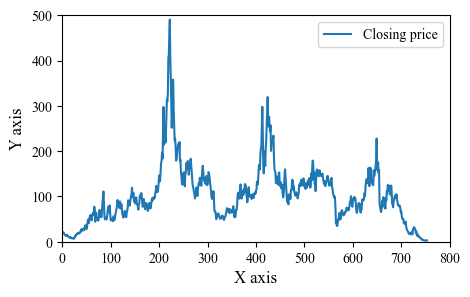

In [5]:
plt.figure(figsize=(5,3), dpi=100)

plt.plot(file['Close'], label = 'Closing price')

plt.xlabel('X axis', fontdict={'fontname':'Times New Roman', 'fontsize': 12})
plt.ylabel('Y axis', fontdict={'fontname':'Times New Roman', 'fontsize': 12})

plt.xticks(fontsize= 10, fontname = 'Times New Roman')
plt.yticks(fontsize= 10, fontname = 'Times New Roman')
plt.legend(fontsize= 40, prop={'family': 'Times New Roman'})

plt.xlim(0,800)
plt.ylim(0,500)

plt.show()

# Data pre processing!

In [6]:
file['rollingmean'] = file['Close'].rolling(7).mean()
file.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,rollingmean
0,2008-01-14,20.230000,21.040001,20.100000,20.850000,20.850000,7800,NaN
1,2008-01-21,22.000000,22.940001,21.040001,21.040001,21.040001,24300,NaN
2,2008-01-28,21.040001,21.299999,20.160000,21.299999,21.299999,1700,NaN
3,2008-02-04,21.080000,21.250000,18.900000,19.270000,19.270000,7000,NaN
4,2008-02-11,18.120001,18.570000,16.799999,17.459999,17.459999,59300,NaN
5,2008-02-18,16.309999,16.700001,15.160000,15.170000,15.170000,102800,NaN
6,2008-02-25,15.000000,15.850000,14.250000,14.550000,14.550000,219000,18.520000
7,2008-03-03,14.500000,14.870000,12.720000,13.310000,13.310000,238200,17.442857
8,2008-03-10,13.530000,13.700000,11.990000,13.010000,13.010000,191300,16.295714
9,2008-03-17,13.510000,16.059999,13.110000,15.000000,15.000000,244700,15.395714


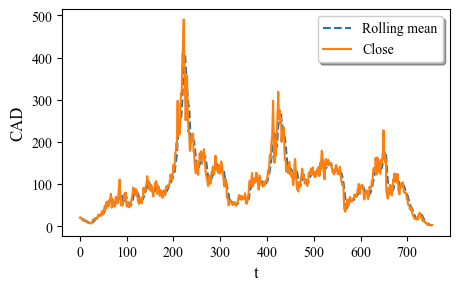

In [7]:
plt.figure(figsize=(5,3), dpi=100)
plt.plot(file['rollingmean'], '--', label = 'Rolling mean')
plt.plot(file['Close'], label = 'Close')
plt.xlabel('t', fontdict={'fontname':'Times New Roman', 'fontsize': 12})
plt.ylabel('CAD', fontdict={'fontname':'Times New Roman', 'fontsize': 12})
plt.xticks(fontsize= 10, fontname = 'Times New Roman')
plt.yticks(fontsize= 10, fontname = 'Times New Roman')
plt.legend(loc='best', shadow = True, fontsize= 10, prop={'family': 'Times New Roman'})
plt.show()

# Data prep for training!

In [8]:
X = pd.DataFrame(file['rollingmean'][7:])

In [9]:
sc = MinMaxScaler(feature_range=(0, 1))
X_scaled = sc.fit_transform(X)

In [10]:
X_train = []
y_train = []
for i in range(60, 600):
    X_train.append(X_scaled[i-60:i, 0])
    y_train.append(X_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Model training

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [12]:
regressor = Sequential()

In [13]:
regressor.add(LSTM(units = 25, return_sequences = True, 
                   input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 25, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 25, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 25))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [14]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 50, batch_size = 16)

Epoch 1/50
34/34 [==============================] - 9s 52ms/step - loss: 0.0245
Epoch 2/50
34/34 [==============================] - 2s 52ms/step - loss: 0.0147
Epoch 3/50
34/34 [==============================] - 2s 51ms/step - loss: 0.0115
Epoch 4/50
34/34 [==============================] - 2s 52ms/step - loss: 0.0100
Epoch 5/50
34/34 [==============================] - 2s 56ms/step - loss: 0.0071
Epoch 6/50
34/34 [==============================] - 2s 64ms/step - loss: 0.0081
Epoch 7/50
34/34 [==============================] - 3s 76ms/step - loss: 0.0068
Epoch 8/50
34/34 [==============================] - 3s 77ms/step - loss: 0.0063
Epoch 9/50
34/34 [==============================] - 3s 77ms/step - loss: 0.0063
Epoch 10/50
34/34 [==============================] - 3s 77ms/step - loss: 0.0060
Epoch 11/50
34/34 [==============================] - 3s 77ms/step - loss: 0.0052
Epoch 12/50
34/34 [==============================] - 3s 76ms/step - loss: 0.0056
Epoch 13/50
34/34 [==================

# Model testing

In [15]:
X_test = []
for i in range(660, 720):
    X_test.append(X_scaled[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
psp = sc.inverse_transform(predicted_stock_price)

2/2 [==============================] - 2s 31ms/step


In [16]:
y_test = np.array(file['rollingmean'][659:719])

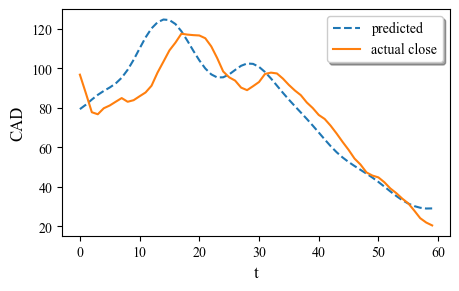

In [17]:
plt.figure(figsize=(5,3), dpi=100)

plt.plot(psp, '--', label = 'predicted')
plt.plot(y_test, label = 'actual close')

plt.xlabel('t', fontdict={'fontname':'Times New Roman', 'fontsize': 12})
plt.ylabel('CAD', fontdict={'fontname':'Times New Roman', 'fontsize': 12})

plt.xticks(fontsize= 10, fontname = 'Times New Roman')
plt.yticks(fontsize= 10, fontname = 'Times New Roman')

plt.legend(loc='best', shadow = True, fontsize= 10, prop={'family': 'Times New Roman'})

plt.show()